<a href="https://colab.research.google.com/github/SurajP79/Python/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

read of data

In [ ]:
df = pd.read_excel('data.xlsx')

In [ ]:
df.head()

,Can_ID,Compensation,Joining Date,Leaving Date,Designation,Job Location,Gender,Birth Date,SSC %,SSC Board,HSC Year,HSC %,HSC Board,Student ID,College_Tier,Graduation,Graduation Field,GradScore,GradCity,GradCityTier,GradState,GradYear,Sec1,Sec2,Sec3,Sec4,Sec5,Sec6,Sec7,Sec8,Sec9,Sec10,Sec11,Per1,Per2,Per3,Per4,Per5
0,134963,6300000,2021-03-01,present,junior manager,angul,m,1986-05-12,72.50,jseb,2004.0,62.6,cbse,1424,2.0,B.Tech/B.E.,instrumentation and control engineering,88.40,1424,0.0,West Bengal,2010,595,365,705,0.910770,455,433,-1,-1,-1,-1,-1,-0.5719,0.5008,-1.0697,-0.5253,0.1864
1,107796,6022521,2021-01-01,present,engineer,Mumbai,m,1989-01-09,67.00,gujarat board,2006.0,64.0,gujarat board,984,2.0,B.Tech/B.E.,mechanical engineering,75.00,984,0.0,Gujarat,2010,385,455,495,0.535863,-1,-1,-1,393,-1,-1,-1,-1.4992,-0.2793,-0.3440,-0.8778,-0.1295
2,30706,5955322,2021-02-01,present,design engineer,Bangalore,m,1987-10-02,89.33,icse,2005.0,82.4,cbse,8460,1.0,B.Tech/B.E.,electronics and communication engineering,71.49,8460,1.0,Delhi,2010,635,685,735,0.649390,665,356,-1,-1,-1,-1,-1,1.4208,1.2114,1.7007,-1.7556,0.2889
3,108231,5872107,2020-08-01,2021-06-01 00:00:00,office coordinator,Hyderabad,f,1987-01-07,61.00,ssc,2004.0,58.0,intermideate,1029,2.0,MCA,computer application,72.00,1029,1.0,Telangana,2020,355,315,435,0.600057,435,-1,-1,-1,-1,-1,-1,-0.2628,-1.3713,0.0914,0.1798,0.5024
4,608841,5750887,2013-07-01,present,senior software developer,Bangalore,f,1991-01-09,91.20,cbse,2009.0,89.8,cbse,285,1.0,B.Tech/B.E.,computer engineering,96.00,285,0.0,Punjab,2013,615,585,765,0.994051,675,-1,-1,-1,-1,-1,-1,-0.1590,0.5454,0.4711,-1.5021,-1.0524


### **Data Cleaning**

We are going to delete some columns: 


*   **Candidate ID**, **Student ID** - Unique for every student 
*   **Leaving Date**, **Birth Date**, **HSC Year** - Do not require as per our objective
*   **GradCity** - A unique ID to identify the city in which the college is located in
*   **GradCityTier** - The tier of the city in which the college is located in (based on population)
*   **GradState** - Name of the state in which the college is located
*   **Job Location** - City in which the candidate is offered the job



In [ ]:
df.drop(['Can_ID', 'Leaving Date', 'Birth Date', 'HSC Year', 'Student ID', 'GradCity', 'GradCityTier', 'GradState', 'Job Location'], axis= 1, inplace= True)

In [ ]:
df.head(1)

,Compensation,Joining Date,Designation,Gender,SSC %,SSC Board,HSC %,HSC Board,College_Tier,Graduation,Graduation Field,GradScore,GradYear,Sec1,Sec2,Sec3,Sec4,Sec5,Sec6,Sec7,Sec8,Sec9,Sec10,Sec11,Per1,Per2,Per3,Per4,Per5
0,6300000,2021-03-01,junior manager,m,72.5,jseb,62.6,cbse,2.0,B.Tech/B.E.,instrumentation and control engineering,88.4,2010,595,365,705,0.91077,455,433,-1,-1,-1,-1,-1,-0.5719,0.5008,-1.0697,-0.5253,0.1864


In [ ]:
df.Per1.unique()

array([-0.5719, -1.4992,  1.4208, -0.2628, -0.159 ,  0.2009, -0.7335,
       -0.881 , -1.5964,  1.592 ,  0.2718, -0.4173,  0.0464, -1.1901,
        0.9737, -1.1644,  0.51  , -2.272 ,  1.4374,  1.2828, -3.3539,
       -0.7264,  0.6646,  0.1623, -0.0154,  0.3555, -1.0355, -0.5899,
        1.5644,  0.5591, -2.1175, -1.3447,  0.4155, -0.4463,  1.2772,
       -0.3014, -0.1082,  0.7027, -0.8772,  1.1283, -1.9629,  0.8192,
        0.1282,  0.99  , -1.5953, -1.8083, -0.3027, -2.1698,  0.215 ,
       -2.7443,  1.1336, -1.6538, -2.7357, -3.0448, -1.8825, -3.1994,
        0.8463, -1.7389, -2.8903, -2.0262,  0.3941, -3.5085, -1.4517,
        0.626 , -1.0208, -0.6491, -0.0696, -0.5332,  1.7081,  1.2266,
       -2.4266,  1.7465, -2.1561,  0.8578, -0.9653, -2.5811,  0.7419,
       -1.3742, -1.308 ,  0.7208,  1.3215, -1.1128,  1.5533, -1.5765,
       -3.6631, -4.1267, -1.6924,  1.9011,  0.2782,  1.0896, -3.4624,
       -0.7651,  1.8517, -3.0315, -0.9969,  1.7852, -3.7496, -0.1855,
       -1.2287,  1.2

In [ ]:
df['Joining Date'] = pd.to_datetime(df['Joining Date']).dt.year

year2_place means how much year required to place, if - 

year2place = 0: student is placed during placement 

year2_place = 1: student is placed after 1 year of graduation, so on.

In [ ]:
df['year2_place'] = df['Joining Date'] - df['GradYear'] 

In [ ]:
df.year2_place.unique()

array([  11,    0,    4,    3,   -1,    1,    2,   -5,    9,   -2,    7,
         -6,   -8,    6,   -9,   -4,   -3, 2014,    8,   10,   12,    5,
         -7,  -10])

In [ ]:
for i in range(-11, 12, 1):
  df_placed_inbet = df[(df.year2_place == i)]
  print('Placed {} year after graduation'.format(i))
  print(df_placed_inbet.shape)

Placed -11 year after graduation
(0, 30)
Placed -10 year after graduation
(1, 30)
Placed -9 year after graduation
(6, 30)
Placed -8 year after graduation
(5, 30)
Placed -7 year after graduation
(1, 30)
Placed -6 year after graduation
(20, 30)
Placed -5 year after graduation
(8, 30)
Placed -4 year after graduation
(17, 30)
Placed -3 year after graduation
(10, 30)
Placed -2 year after graduation
(26, 30)
Placed -1 year after graduation
(35, 30)
Placed 0 year after graduation
(2234, 30)
Placed 1 year after graduation
(1106, 30)
Placed 2 year after graduation
(179, 30)
Placed 3 year after graduation
(224, 30)
Placed 4 year after graduation
(12, 30)
Placed 5 year after graduation
(3, 30)
Placed 6 year after graduation
(7, 30)
Placed 7 year after graduation
(6, 30)
Placed 8 year after graduation
(2, 30)
Placed 9 year after graduation
(8, 30)
Placed 10 year after graduation
(4, 30)
Placed 11 year after graduation
(82, 30)


It is clear that there is some mis-entry in the data. as the student got place before 10 year of the graduation. which is not possible in general.

Here we consider those data only which has, year2_place = -2 to year2place = 3. 


*   As for -1, -2 there is a chance that they may got some PPOs. for 1, 2were there may be probablity for Preparing Govt. Jobs, pursuing higher education, or imporving their skills.

*   One has year2_place 2014 with joining date = 2014, means he/she didn't complete his/her graduation.(MIS- ENTRY)

In [ ]:
df = df[(df.year2_place > -3) & (df.year2_place < 3)]

In [ ]:
df.shape

(3580, 30)

In [ ]:
df.head(3)

,Compensation,Joining Date,Designation,Gender,SSC %,SSC Board,HSC %,HSC Board,College_Tier,Graduation,Graduation Field,GradScore,GradYear,Sec1,Sec2,Sec3,Sec4,Sec5,Sec6,Sec7,Sec8,Sec9,Sec10,Sec11,Per1,Per2,Per3,Per4,Per5,year2_place
3,5872107,2020,office coordinator,f,61.0,ssc,58.00,intermideate,2.0,MCA,computer application,72.00,2020,355,315,435,0.600057,435,-1,-1,-1,-1,-1,-1,-0.2628,-1.3713,0.0914,0.1798,0.5024,0
4,5750887,2013,senior software developer,f,91.2,cbse,89.80,cbse,1.0,B.Tech/B.E.,computer engineering,96.00,2013,615,585,765,0.994051,675,-1,-1,-1,-1,-1,-1,-0.1590,0.5454,0.4711,-1.5021,-1.0524,0
5,5712778,2020,engineer trainee,m,NaN,icse,65.25,isc,2.0,B.Tech/B.E.,mechanical engineering,73.63,2020,575,595,405,0.021066,-1,-1,-1,206,-1,-1,-1,0.2009,1.1248,1.1074,-1.1128,0.9763,0


**HSC Board analysis**

In [ ]:
print(df['HSC Board'].nunique())
print(df['HSC Board'].unique())

281
['intermideate' 'cbse' 'isc' 'pseb' 'board of intermediate'
 'board of intermediate education, andhra pradesh' 'state board'
 'matriculation' 'andhra pradesh board of secondary education' 'ghseb' 0
 'up bord' 'rbse' 'maharashtra state board mumbai divisional board' 'hbse'
 'board of intermediate,ap' 'karnataka state board' 'up board'
 'up board allahabad' 'icse'
 'punjab state board of technical education & industrial training' 'hsc'
 'hslc (tamil nadu state board)' 'tamilnadu state board' 'pre-university'
 'maharashtra board' 'mp' 'intermediate board'
 'board of intermediate education' 'maharashtra board, pune'
 'central board of secondary education' 'pu board' 'u p board' 'bie'
 'board of intermediate education,ap' 'jharkhand acedemic council'
 'tamil nadu state board' 'chse(concil of higher secondary education)'
 'state' 'ipe' 'board of intermediate education, ap' 'mp board'
 'pre university board, karnataka'
 'board of intermediate education:ap,hyderabad' 'board of intermediate

It is clear that, there are 281 differnt boards but they are not as unique as showm here. Because: **up board, uttar pradesh board, allahabad board, up allahabad board, bright way college (up board), up-board, upboard** are some unique value of board but actually they are same. 

In [ ]:
df.drop('HSC Board', axis= 1, inplace=True)

In [ ]:
df.head(2)

,Compensation,Joining Date,Designation,Gender,SSC %,SSC Board,HSC %,College_Tier,Graduation,Graduation Field,GradScore,GradYear,Sec1,Sec2,Sec3,Sec4,Sec5,Sec6,Sec7,Sec8,Sec9,Sec10,Sec11,Per1,Per2,Per3,Per4,Per5,year2_place
3,5872107,2020,office coordinator,f,61.0,ssc,58.0,2.0,MCA,computer application,72.0,2020,355,315,435,0.600057,435,-1,-1,-1,-1,-1,-1,-0.2628,-1.3713,0.0914,0.1798,0.5024,0
4,5750887,2013,senior software developer,f,91.2,cbse,89.8,1.0,B.Tech/B.E.,computer engineering,96.0,2013,615,585,765,0.994051,675,-1,-1,-1,-1,-1,-1,-0.1590,0.5454,0.4711,-1.5021,-1.0524,0


**SSC Board analysis**

In [ ]:
print(df['SSC Board'].nunique())
print(df['SSC Board'].unique())

224
['ssc' 'cbse' 'icse' 'pseb' 'board of secondary education, andhra pradesh'
 'state board' 'matriculation' 'gseb' 0 'up bord' 'rbse'
 'maharashtra state board mumbai divisional board' 'karnataka state board'
 'up board' 'up board allahabad' 'matric' 'tamilnadu state board'
 'sslc,karnataka' 'maharashtra board' 'mp' 'board of secondary education'
 'maharashtra board, pune' 'central board of secondary education' 'sslc'
 'secondary school of education' 'mp state board' 'u p board'
 'board of secondary education,ap' 'jharkhand acedemic council'
 'bse(board of secondary education)' 'state' 'mp board'
 'andhra pradesh board ssc' 'kseeb' 'apsche' 'up'
 'karnataka secondary education' 'karnataka education board'
 'karnataka board' 'board of  secondary education' 'upboard' 'wbbse'
 'anglo indian' 'jkbose' 'board of secondary school education'
 'j & k bord' 'west bengal board of secondary education'
 'maharashtra state board' 'karnataka sslc board bangalore' 'hse'
 'council for indian school 

It is clear that, there are 224 differnt boards but they are not as unique as showm here. Because: **they are not as unique as shown here.**

In [ ]:
df.drop('SSC Board', axis= 1, inplace=True)

In [ ]:
df.head(2)

,Compensation,Joining Date,Designation,Gender,SSC %,HSC %,College_Tier,Graduation,Graduation Field,GradScore,GradYear,Sec1,Sec2,Sec3,Sec4,Sec5,Sec6,Sec7,Sec8,Sec9,Sec10,Sec11,Per1,Per2,Per3,Per4,Per5,year2_place
3,5872107,2020,office coordinator,f,61.0,58.0,2.0,MCA,computer application,72.0,2020,355,315,435,0.600057,435,-1,-1,-1,-1,-1,-1,-0.2628,-1.3713,0.0914,0.1798,0.5024,0
4,5750887,2013,senior software developer,f,91.2,89.8,1.0,B.Tech/B.E.,computer engineering,96.0,2013,615,585,765,0.994051,675,-1,-1,-1,-1,-1,-1,-0.1590,0.5454,0.4711,-1.5021,-1.0524,0


**Graduation Degree analysis**

In [ ]:
df.Graduation.unique()

array(['MCA', 'B.Tech/B.E.', 'M.Tech./M.E.', 'B.Tech/@B.E.', 'MCA_',
       'M.Sc. (Tech.)'], dtype=object)

Here B.Tech/B.E. and B.Tech/@B.E should be merge. Similarly MCA and MCA_ are also be merged


In [ ]:
df['Graduation'] = df['Graduation'].replace(['B.Tech/@B.E.'],'B.Tech/B.E.')
df['Graduation'] = df['Graduation'].replace(['MCA_'],'MCA')

In [ ]:
df.Graduation.unique()

array(['MCA', 'B.Tech/B.E.', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

**Graduation Field**

In [ ]:
print(df['Graduation Field'].nunique())
print(df['Graduation Field'].unique())

44
['computer application' 'computer engineering' 'mechanical engineering'
 'electronics and communication engineering' 'information technology'
 'computer science & engineering' 'electronics and electrical engineering'
 nan 'electrical engineering' 'civil engineering' 'chemical engineering'
 'polymer technology' 'instrumentation and control engineering'
 'industrial & production engineering'
 'electronics and instrumentation engineering'
 'electronics & telecommunications' 'other'
 'information science engineering' 'computer networking'
 'mechanical and automation' 'information science'
 'electronics & instrumentation eng' 'biotechnology'
 'information & communication technology' 'biomedical engineering'
 'electronics engineering' 'computer science'
 'telecommunication engineering' 'automobile/automotive engineering'
 'industrial engineering' 'metallurgical engineering'
 'computer science and technology' 'internal combustion engine'
 'mechatronics' 'ceramic engineering'
 'applied elec

In [ ]:
# merging of similar type of engineering
df['Graduation Field'] = df['Graduation Field'].replace(['computer science & engineering', 'computer networking', 'computer science', 'computer science and technology', 'computer and communication engineering'], 'computer engineering')
df['Graduation Field'] = df['Graduation Field'].replace(['electronics and communication engineering', 'electrical engineering', 'electronics and instrumentation engineering','electronics engineering','electronics and computer engineering','electrical and power engineering', 'electronics'],'electronics and electrical engineering')
df['Graduation Field'] = df['Graduation Field'].replace(['information & communication technology','information science engineering', 'information science'], 'information technology')
df['Graduation Field'] = df['Graduation Field'].replace(['electronics & instrumentation eng', 'applied electronics and instrumentation', 'instrumentation and control engineering', 'control and instrumentation engineering'],'instrumentation engineering' )
df['Graduation Field'] = df['Graduation Field'].replace(['industrial & production engineering', 'industrial & management engineering'],'industrial engineering')
df['Graduation Field'] = df['Graduation Field'].replace(['mechanical and automation','automobile/automotive engineering','internal combustion engine','power systems and automation'], 'automobile engineering')
df['Graduation Field'] = df['Graduation Field'].replace(['biotechnology'], 'biomedical engineering')
df['Graduation Field'] = df['Graduation Field'].replace(['electronics & telecommunications'], 'telecommunication engineering')

In [ ]:
print(df['Graduation Field'].nunique())

18


In [ ]:
df['Graduation Field'].isna().sum()

23

In [ ]:
df[df['Graduation Field'].isna()]

,Compensation,Joining Date,Designation,Gender,SSC %,HSC %,College_Tier,Graduation,Graduation Field,GradScore,GradYear,Sec1,Sec2,Sec3,Sec4,Sec5,Sec6,Sec7,Sec8,Sec9,Sec10,Sec11,Per1,Per2,Per3,Per4,Per5,year2_place
28,4000000,2020,NaN,m,53.00,65.00,2.0,MCA,NaN,68.00,2020,405,455,475,0.525923,415,-1,-1,-1,-1,-1,-1,-3.3539,-0.4353,-1.0697,-0.0552,-2.6572,0
309,250000,2011,.net@developer,m,49.00,59.00,2.0,MCA,NaN,74.00,2011,455,305,355,0.377551,375,-1,-1,-1,-1,-1,-1,0.8192,0.1888,-0.3440,-0.7603,0.8183,0
1241,345000,2013,NaN,m,56.00,61.00,NaN,MCA,NaN,82.00,2013,710,500,470,0.930371,565,-1,-1,-1,-1,-1,-1,0.1282,0.0459,0.7785,2.1743,-0.6692,0
1263,340000,2011,software developer,m,53.00,66.00,2.0,MCA,NaN,67.00,2011,355,325,535,0.377551,375,-1,-1,-1,-1,-1,-1,0.6646,-0.7473,1.1074,0.1798,0.3444,0
1366,330000,2014,associate software engineer,m,52.33,72.00,2.0,MCA,NaN,79.15,2013,450,525,545,0.735796,475,-1,-1,-1,-1,-1,-1,-0.0154,1.2114,0.6248,0.7798,0.8637,1
2353,240000,2014,asp.net developer,m,51.83,61.00,2.0,MCA,NaN,72.00,2013,335,450,650,0.843124,515,-1,-1,-1,-1,-1,-1,-0.3027,-0.4536,-0.7585,0.2727,0.0973,1
2358,240000,2014,NaN,m,55.33,63.60,2.0,MCA,NaN,82.78,2014,650,545,380,0.744758,435,-1,438,-1,-1,-1,-1,0.7027,1.3779,-1.5270,-1.5021,0.4805,0
2689,205000,2014,help desk technician,m,53.00,59.00,2.0,MCA,NaN,64.00,2013,495,515,405,0.486747,465,-1,376,-1,-1,-1,-1,0.8463,0.2124,0.9322,-2.2627,0.4805,1
2730,200000,2014,NaN,f,55.00,65.20,2.0,MCA,NaN,81.00,2014,430,445,295,0.953900,425,-1,530,-1,-1,-1,-1,0.4155,-0.6201,-1.0659,0.0192,-2.0105,0
2731,200000,2013,NaN,m,55.50,57.50,2.0,MCA,NaN,76.80,2013,415,495,445,0.864685,525,-1,-1,-1,-1,-1,-1,-0.3027,-0.6201,-0.1437,0.9066,-1.6273,0


All the missing data from Graduation Field is Belong to the Tier 2 and MCA Graduation Degree. So it is clear to fill these NaN values with **Computer application** 

In [ ]:
df['Graduation Field'] = df['Graduation Field'].fillna('computer application')

In [ ]:
df['Graduation Field'].isna().sum()

0

In [ ]:
df.head(2)

,Compensation,Joining Date,Designation,Gender,SSC %,HSC %,College_Tier,Graduation,Graduation Field,GradScore,GradYear,Sec1,Sec2,Sec3,Sec4,Sec5,Sec6,Sec7,Sec8,Sec9,Sec10,Sec11,Per1,Per2,Per3,Per4,Per5,year2_place
3,5872107,2020,office coordinator,f,61.0,58.0,2.0,MCA,computer application,72.0,2020,355,315,435,0.600057,435,-1,-1,-1,-1,-1,-1,-0.2628,-1.3713,0.0914,0.1798,0.5024,0
4,5750887,2013,senior software developer,f,91.2,89.8,1.0,B.Tech/B.E.,computer engineering,96.0,2013,615,585,765,0.994051,675,-1,-1,-1,-1,-1,-1,-0.1590,0.5454,0.4711,-1.5021,-1.0524,0


**Gender Wise analysis**

In [ ]:
df.Gender.isna().sum()

0

In [ ]:
df.Gender.value_counts()

m    2726
f     854
Name: Gender, dtype: int64

**Designation Analysis**

In [ ]:
print(df.Designation.nunique())
print(df.Designation.unique())

394
['office coordinator' 'senior software developer' 'engineer trainee'
 'software engineer' 'design engineer' 'senior software engineer'
 'application developer' 'operations assistant' 'senior engineer'
 'branch manager' 'manager' 'technical support engineer'
 'assistant manager' 'embedded software engineer' nan 'senior developer'
 'assistant system engineer' 'programmer' 'operations analyst'
 'it technician' 'technical lead' 'software test engineer'
 'data scientist' 'field engineer' 'salesforce developer' '.net developer'
 'electrical engineer' 'engineering manager' 'senior web developer'
 'software quality assurance tester' 'business analyst consultant'
 'mechanical design engineer' 'engineer' 'graduate engineer trainee'
 'research scientist' 'senior business analyst' 'ux designer'
 'civil engineer' 'data analyst' 'software developer'
 'software development engineer' 'planning engineer' 'product manager'
 'android developer' 'quality assurance automation engineer'
 'business analy

In [ ]:
df.Designation.isna().sum()

174


*   There are 394 unique Designation. So due to high number of unique values there are not to be make dummies.
*   Also it has 174 null values.



In [ ]:
df.drop('Designation', axis= 1, inplace=True)

In [ ]:
df.head(1)

,Compensation,Joining Date,Gender,SSC %,HSC %,College_Tier,Graduation,Graduation Field,GradScore,GradYear,Sec1,Sec2,Sec3,Sec4,Sec5,Sec6,Sec7,Sec8,Sec9,Sec10,Sec11,Per1,Per2,Per3,Per4,Per5,year2_place
3,5872107,2020,f,61.0,58.0,2.0,MCA,computer application,72.0,2020,355,315,435,0.600057,435,-1,-1,-1,-1,-1,-1,-0.2628,-1.3713,0.0914,0.1798,0.5024,0


There are **-1** entry in all the **Test Score columns**. It represent the candidate was absent in that particular test. We should replace this number with 0 (As they score 0, if they are not present in test)

In [ ]:
df.columns

Index(['Compensation', 'Joining Date', 'Gender', 'SSC %', 'HSC %',
       'College_Tier', 'Graduation', 'Graduation Field', 'GradScore',
       'GradYear', 'Sec1', 'Sec2', 'Sec3', 'Sec4', 'Sec5', 'Sec6', 'Sec7',
       'Sec8', 'Sec9', 'Sec10', 'Sec11', 'Per1', 'Per2', 'Per3', 'Per4',
       'Per5', 'year2_place'],
      dtype='object')

In [ ]:
col = ['Sec1', 'Sec2', 'Sec3', 'Sec4', 'Sec5', 'Sec6', 'Sec7','Sec8', 'Sec9', 'Sec10', 'Sec11', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5']
for x in col:
  df[x] = df[x].replace(-1, 0)

In [ ]:
df.head(1)

,Compensation,Joining Date,Gender,SSC %,HSC %,College_Tier,Graduation,Graduation Field,GradScore,GradYear,Sec1,Sec2,Sec3,Sec4,Sec5,Sec6,Sec7,Sec8,Sec9,Sec10,Sec11,Per1,Per2,Per3,Per4,Per5,year2_place
3,5872107,2020,f,61.0,58.0,2.0,MCA,computer application,72.0,2020,355,315,435,0.600057,435,0,0,0,0,0,0,-0.2628,-1.3713,0.0914,0.1798,0.5024,0


In [ ]:
df.to_excel('mode.xlsx')

### **Exploratory Visulaization**

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fig = px.scatter(df, x= 'SSC %', y= 'Compensation', color='Gender', opacity=0.6, title= 'SSC% Vs Compensation')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(df, x= 'HSC %', y= 'Compensation', color='Gender', opacity=0.6, title= 'HSC% Vs Compensation')
fig.update_traces(marker_size=5)
fig.show()

Here the lot of the data have HSC % more than 100 percentage which is not possible. This is the Mis-Entry in the data. So we should these data.

In [ ]:
df = df[df['HSC %'] < 99.99]

In [ ]:
df.shape

(3547, 27)

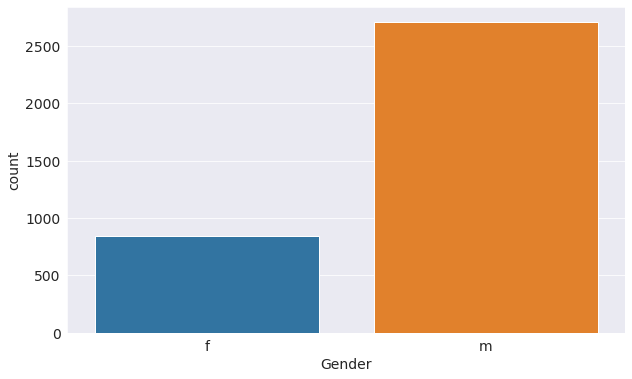

In [ ]:
sns.countplot(x= 'Gender', data=df );

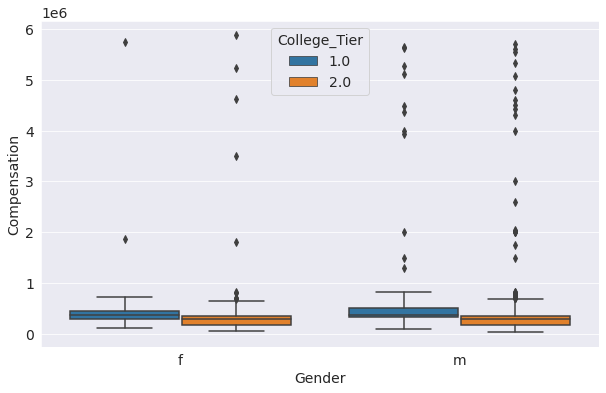

In [ ]:
sns.boxplot(x= 'Gender', data=df, y= 'Compensation', hue= 'College_Tier', whis= 2);

There are a lot of outlier in the data. 

In [ ]:
df[df.Compensation > 1000000].shape

(39, 27)

In [ ]:
df = df[df.Compensation < 1000000]

In [ ]:
df.shape

(3508, 27)

In [ ]:
fig = px.scatter(df, x= 'GradScore', y= 'Compensation', color='Gender', opacity=0.6, title= 'GradScore Vs Compensation')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
df = df[df.GradScore > 20]

In [ ]:
df.shape

(3500, 27)

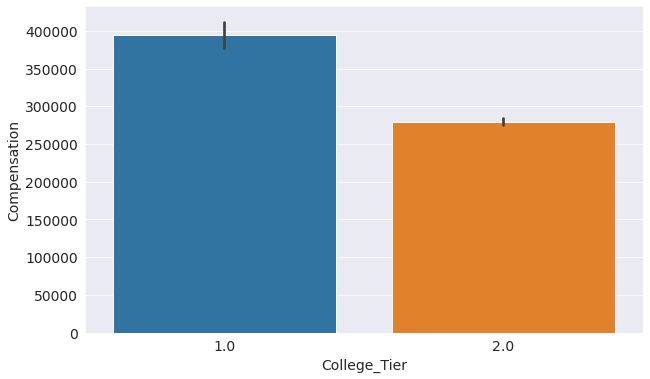

In [ ]:
sns.barplot(x= 'College_Tier', y= 'Compensation', data= df);

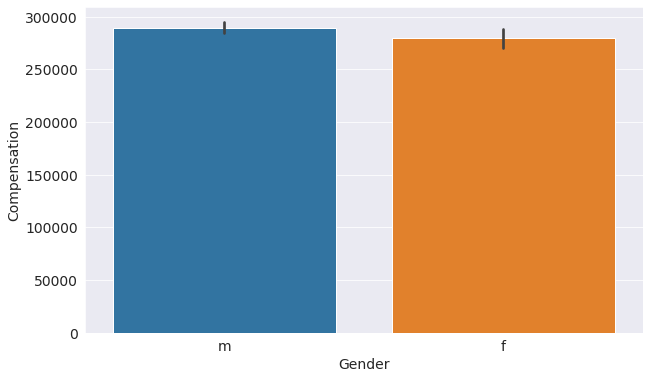

In [ ]:
sns.barplot(x= 'Gender', y= 'Compensation', data= df);

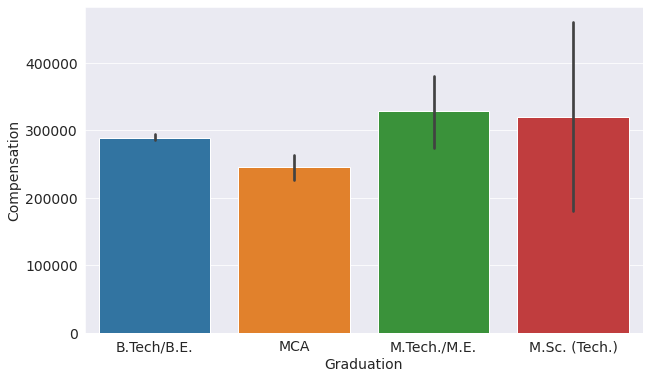

In [ ]:
sns.barplot(x= 'Graduation', y= 'Compensation', data= df);

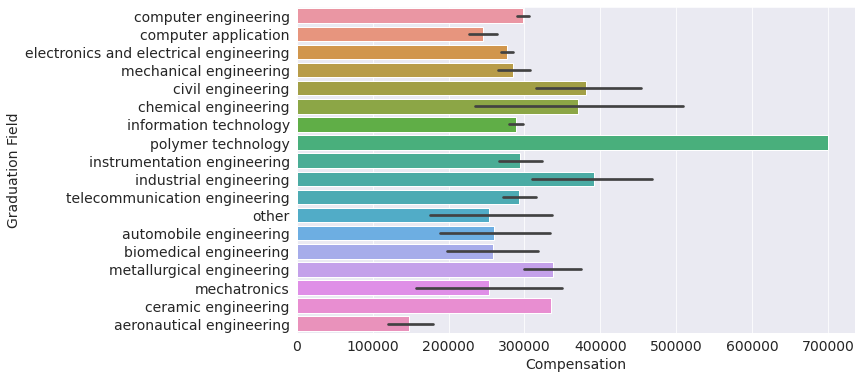

In [ ]:
sns.barplot(y= 'Graduation Field', x= 'Compensation', data= df);

### **Imputing Missing values**

for College Tier 

In [ ]:
df.College_Tier.value_counts()

2.0    3113
1.0     249
Name: College_Tier, dtype: int64

To balance the data set, we replace nan values with Tier 1 

In [ ]:
df.College_Tier.fillna(1, inplace= True)

for SSC % 

In [ ]:
df['SSC %'].fillna(df['SSC %'].median(), inplace= True)

In [ ]:
df.isna().sum()

Compensation        0
Joining Date        0
Gender              0
SSC %               0
HSC %               0
College_Tier        0
Graduation          0
Graduation Field    0
GradScore           0
GradYear            0
Sec1                0
Sec2                0
Sec3                0
Sec4                0
Sec5                0
Sec6                0
Sec7                0
Sec8                0
Sec9                0
Sec10               0
Sec11               0
Per1                0
Per2                0
Per3                0
Per4                0
Per5                0
year2_place         0
dtype: int64

### **Making Dummies**

In [ ]:
sat = pd.get_dummies(df[['Gender', 'Graduation', 'Graduation Field']],drop_first=True)
df = pd.concat([df,sat],axis=1)

In [ ]:
df.drop(['Gender', 'Graduation', 'Graduation Field'], axis= 1, inplace= True)

In [ ]:
df.head(3)

,Compensation,Joining Date,SSC %,HSC %,College_Tier,GradScore,GradYear,Sec1,Sec2,Sec3,Sec4,Sec5,Sec6,Sec7,Sec8,Sec9,Sec10,Sec11,Per1,Per2,Per3,Per4,Per5,year2_place,Gender_m,Graduation_M.Sc. (Tech.),Graduation_M.Tech./M.E.,Graduation_MCA,Graduation Field_automobile engineering,Graduation Field_biomedical engineering,Graduation Field_ceramic engineering,Graduation Field_chemical engineering,Graduation Field_civil engineering,Graduation Field_computer application,Graduation Field_computer engineering,Graduation Field_electronics and electrical engineering,Graduation Field_industrial engineering,Graduation Field_information technology,Graduation Field_instrumentation engineering,Graduation Field_mechanical engineering,Graduation Field_mechatronics,Graduation Field_metallurgical engineering,Graduation Field_other,Graduation Field_polymer technology,Graduation Field_telecommunication engineering
45,450000,2020,90.6,96.3,2.0,83.56,2020,485,495,535,0.563268,425,0,0,0,0,0,0,0.9737,0.8128,0.2366,0.8848,-0.1295,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
50,820000,2014,71.0,64.0,2.0,90.90,2014,520,510,780,0.486747,535,0,376,0,0,0,0,1.2772,0.0459,1.2396,-0.6147,-0.2859,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
52,820000,2014,82.4,79.0,2.0,84.00,2014,585,665,715,0.538387,0,333,0,0,0,0,0,-0.3014,1.1248,-0.0537,-1.3184,0.3444,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_excel('One_data.xlsx')

### **Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

In [ ]:
scaled_df = pd.DataFrame(data = scaled_df, columns = df.columns)

In [ ]:
scaled_df.head(3)

,Compensation,Joining Date,SSC %,HSC %,College_Tier,GradScore,GradYear,Sec1,Sec2,Sec3,Sec4,Sec5,Sec6,Sec7,Sec8,Sec9,Sec10,Sec11,Per1,Per2,Per3,Per4,Per5,year2_place,Gender_m,Graduation_M.Sc. (Tech.),Graduation_M.Tech./M.E.,Graduation_MCA,Graduation Field_automobile engineering,Graduation Field_biomedical engineering,Graduation Field_ceramic engineering,Graduation Field_chemical engineering,Graduation Field_civil engineering,Graduation Field_computer application,Graduation Field_computer engineering,Graduation Field_electronics and electrical engineering,Graduation Field_industrial engineering,Graduation Field_information technology,Graduation Field_instrumentation engineering,Graduation Field_mechanical engineering,Graduation Field_mechatronics,Graduation Field_metallurgical engineering,Graduation Field_other,Graduation Field_polymer technology,Graduation Field_telecommunication engineering
0,0.528662,0.9,0.878880,0.934426,1.0,0.588484,0.909091,0.438849,0.500000,0.532051,0.563318,0.505952,0.000000,0.000000,0.0,0.0,0.0,0.0,0.833126,0.857931,0.699435,0.588408,0.804606,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.3,0.507949,0.346084,1.0,0.729829,0.363636,0.489209,0.525000,0.846154,0.486791,0.636905,0.000000,0.525874,0.0,0.0,0.0,0.0,0.882702,0.758157,0.844454,0.338304,0.787239,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.3,0.723694,0.619308,1.0,0.596957,0.363636,0.582734,0.783333,0.762821,0.538435,0.000000,0.544118,0.000000,0.0,0.0,0.0,0.0,0.624845,0.898522,0.657461,0.220932,0.857227,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scaled_df.to_excel('scaled_data.xlsx')

### **Train Test Split**

In [ ]:
X = scaled_df.drop('Compensation', axis=1)
y = scaled_df['Compensation']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((2800, 44), (700, 44))

### **Model**

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
model_lr.score(X_train, y_train)

0.28023348754965405

In [ ]:
model_lr.score(X_test, y_test)

0.28204883296026306

In [ ]:
df.head(2)

,Compensation,Joining Date,SSC %,HSC %,College_Tier,GradScore,GradYear,Sec1,Sec2,Sec3,Sec4,Sec5,Sec6,Sec7,Sec8,Sec9,Sec10,Sec11,Per1,Per2,Per3,Per4,Per5,year2_place,Gender_m,Graduation_M.Sc. (Tech.),Graduation_M.Tech./M.E.,Graduation_MCA,Graduation Field_automobile engineering,Graduation Field_biomedical engineering,Graduation Field_ceramic engineering,Graduation Field_chemical engineering,Graduation Field_civil engineering,Graduation Field_computer application,Graduation Field_computer engineering,Graduation Field_electronics and electrical engineering,Graduation Field_industrial engineering,Graduation Field_information technology,Graduation Field_instrumentation engineering,Graduation Field_mechanical engineering,Graduation Field_mechatronics,Graduation Field_metallurgical engineering,Graduation Field_other,Graduation Field_polymer technology,Graduation Field_telecommunication engineering
45,450000,2020,90.6,96.3,2.0,83.56,2020,485,495,535,0.563268,425,0,0,0,0,0,0,0.9737,0.8128,0.2366,0.8848,-0.1295,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
50,820000,2014,71.0,64.0,2.0,90.90,2014,520,510,780,0.486747,535,0,376,0,0,0,0,1.2772,0.0459,1.2396,-0.6147,-0.2859,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['Compensation', 'Joining Date', 'SSC %', 'HSC %', 'College_Tier',
       'GradScore', 'GradYear', 'Sec1', 'Sec2', 'Sec3', 'Sec4', 'Sec5', 'Sec6',
       'Sec7', 'Sec8', 'Sec9', 'Sec10', 'Sec11', 'Per1', 'Per2', 'Per3',
       'Per4', 'Per5', 'year2_place', 'Gender_m', 'Graduation_M.Sc. (Tech.)',
       'Graduation_M.Tech./M.E.', 'Graduation_MCA',
       'Graduation Field_automobile engineering',
       'Graduation Field_biomedical engineering',
       'Graduation Field_ceramic engineering',
       'Graduation Field_chemical engineering',
       'Graduation Field_civil engineering',
       'Graduation Field_computer application',
       'Graduation Field_computer engineering',
       'Graduation Field_electronics and electrical engineering',
       'Graduation Field_industrial engineering',
       'Graduation Field_information technology',
       'Graduation Field_instrumentation engineering',
       'Graduation Field_mechanical engineering',
       'Graduation Field_mechatronics

In [ ]:
df.to_excel('modified.xlsx')